In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [3]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\SESSA-Project-main\output\Master.npy")

In [24]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
thickness = torch.tensor(range(1,25),dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
test = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(test))
print(shape(thickness))
print(energy)
print(test)

torch.Size([2048])
torch.Size([24, 2048])
torch.Size([24])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([[2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036],
        [2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037],
        [2.9357, 2.9361, 2.9365,  ..., 0.0038, 0.0038, 0.0038],
        ...,
        [2.9114, 2.9118, 2.9122,  ..., 0.0047, 0.0047, 0.0046],
        [2.8748, 2.8752, 2.8755,  ..., 0.0047, 0.0047, 0.0047],
        [2.9147, 2.9151, 2.9154,  ..., 0.0048, 0.0047, 0.0047]])


In [35]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-6)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(24,4096)
        self.Matrix2 = nn.Linear(4096,4096)
        self.Matrix3 = nn.Linear(4096,2048)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x

x = thickness
y = test
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=500)

100%|██████████| 500/500 [00:36<00:00, 13.64it/s]


In [36]:
shape(f(x))

torch.Size([2048])

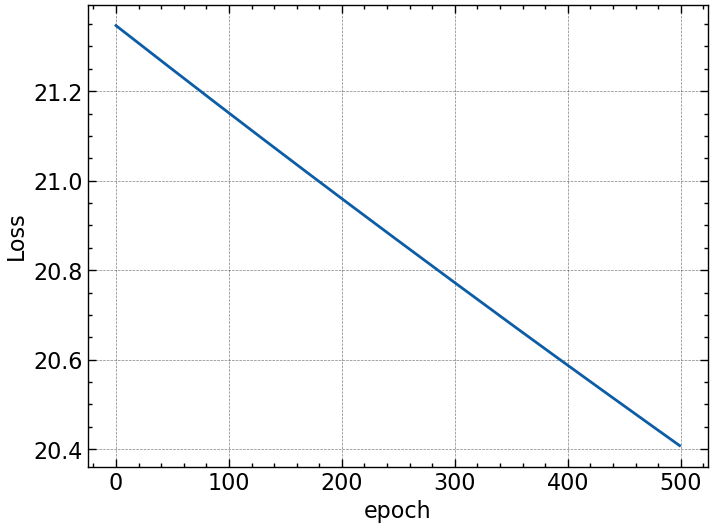

In [27]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

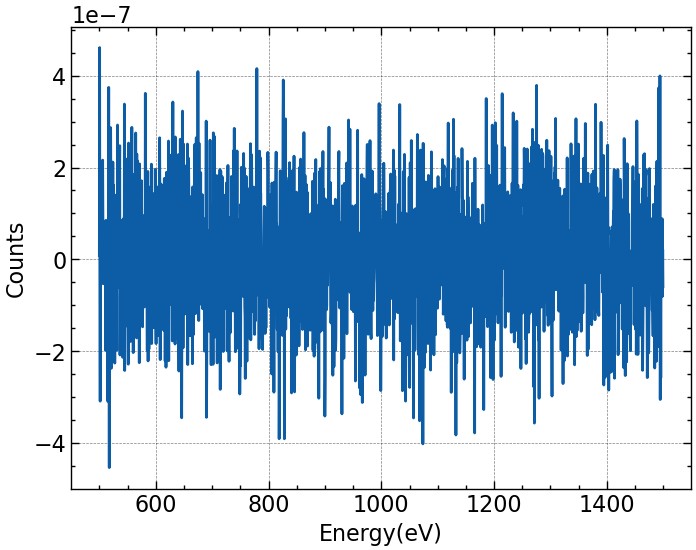

In [28]:
plt.plot(energy,f(x).detach().numpy()/10**7)
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

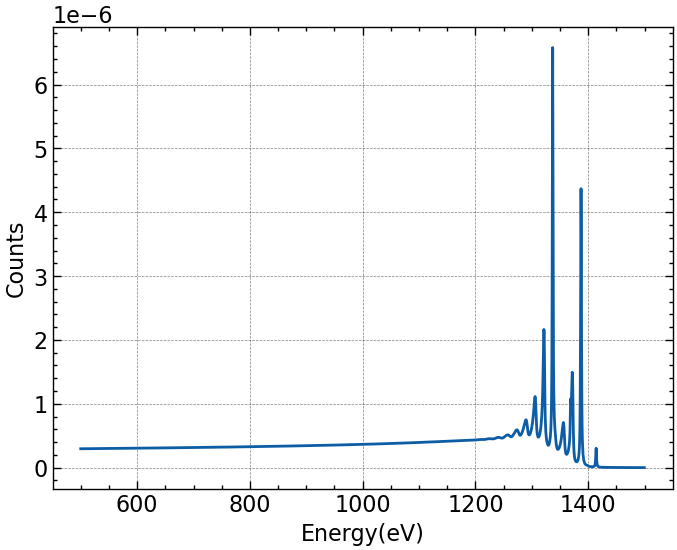

In [29]:
plt.plot(energy,y/10**7)
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

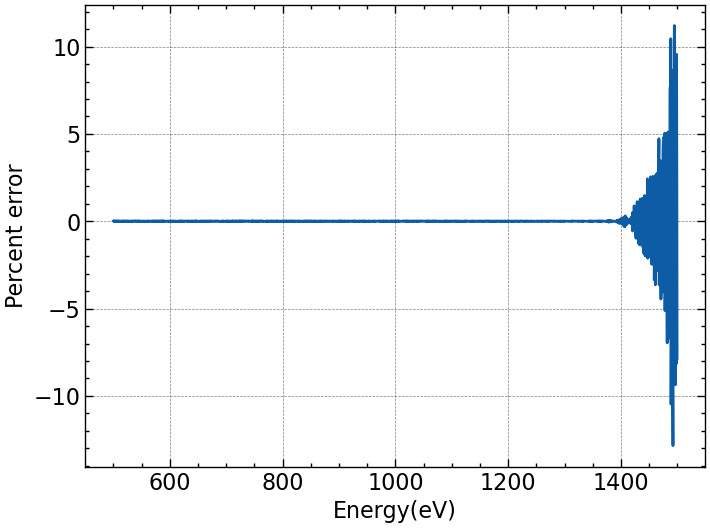

In [57]:
plt.plot(x, (y-f(x).detach().numpy())/y*100)
plt.xlabel("Energy(eV)")
plt.ylabel("Percent error")
plt.show()

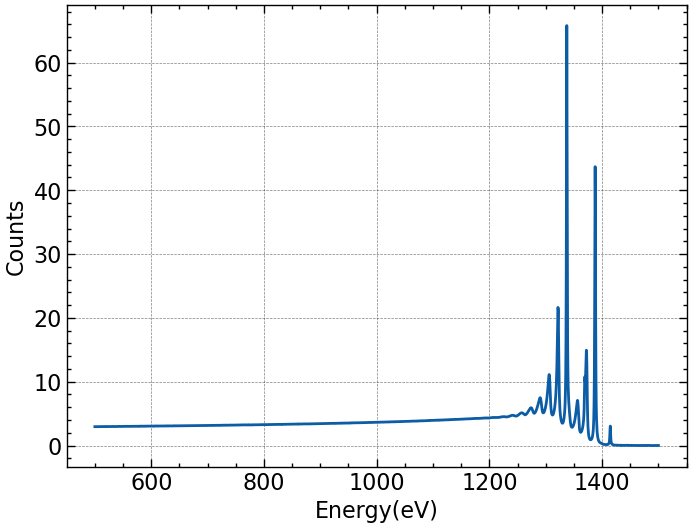

In [58]:
x2 = torch.tensor(linspace(500,1500, 2048), dtype = torch.float)
plt.plot(x2, f(x2).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

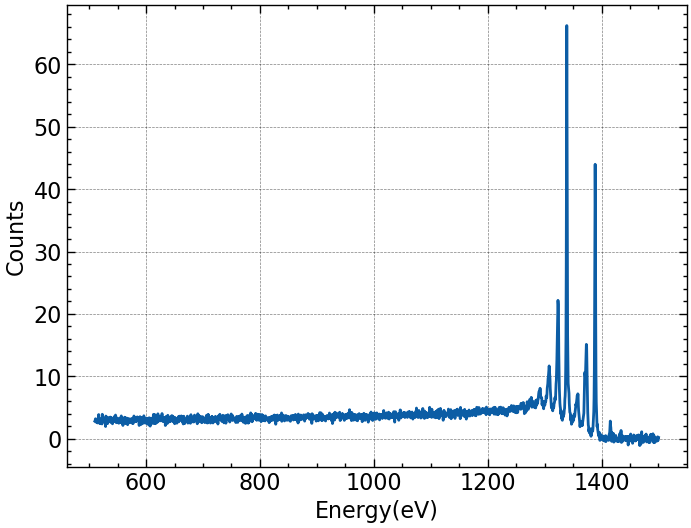

In [59]:
x3 = torch.tensor(linspace(510,1500, 2048), dtype = torch.float)
plt.plot(x3, f(x3).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()

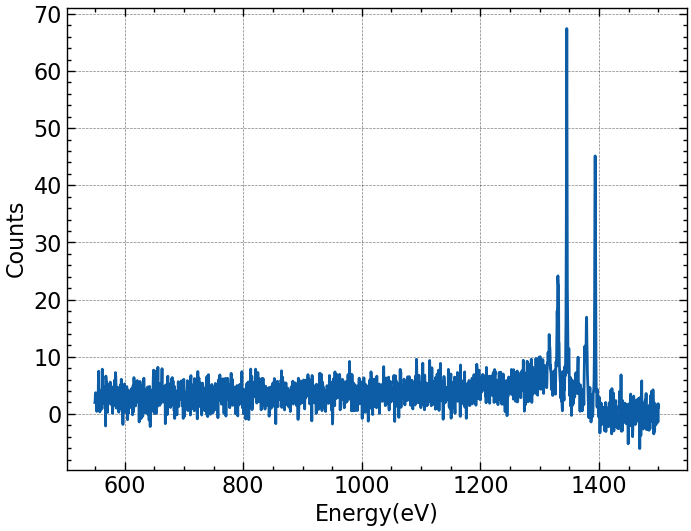

In [60]:
x3 = torch.tensor(linspace(550,1500, 2048), dtype = torch.float)
plt.plot(x3, f(x3).detach().numpy())
plt.xlabel("Energy(eV)")
plt.ylabel("Counts")
plt.show()